# Box blur

As a way to get more fluent with NumPy, I've been playing with some basic image processing algorithms. One of the simplest things ones to understand is the [box blur](https://en.wikipedia.org/wiki/Box_blur):

> A box blur (also known as a box linear filter) is a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image. It is a form of low-pass ("blurring") filter. A 3 by 3 box blur ("radius 1") can be written as matrix:
>
> ![](../images/box-blur-kernel.svg)

Let's start with some code to load and display an image. We'll use the [binary PPM ("Portable PixMap") format](https://en.wikipedia.org/wiki/Netpbm), since it's simple to parse.

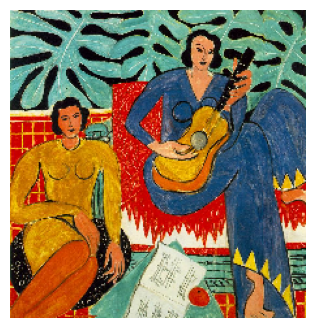

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def read_ppm_p6(file_path):
    with open(file_path, 'rb') as f:
        assert f.readline().decode('ascii').strip() == 'P6'

        # Skip comments
        line = f.readline()
        while line.startswith(b'#'):
            line = f.readline()

        width, height = map(int, line.decode('ascii').split())

        max_color = int(f.readline().decode('ascii').strip())
        assert max_color == 255, "oh no: max_color != 255"

        return np.frombuffer(f.read(), dtype=np.uint8).reshape((height, width, 3))

# Read the image
file_path = '../images/Matisse-Small.ppm'
image = read_ppm_p6(file_path)

def show_image(img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image)

For the naive implementation of box blur, we just iterate over every channel (r, g, b) of each output pixel. At each pixel, we examine the input pixels plus the surrounding 8 neighbouring pixels (assuming a kernel size of 3).

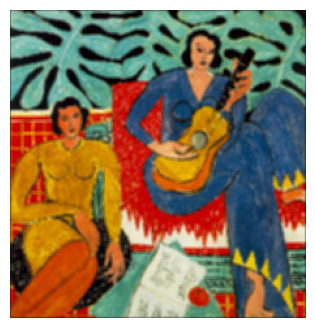

In [6]:
def box_blur_slow(image, kernel_size=3):
    height, width, _ = image.shape

    # The unnormalized kernel is a matrix of all 1s.
    #  We normalize it by dividing by the number of elements in the kernel.
    kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2
    output = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            for chan in range(3):
                # Apply the kernel
                for k in range(kernel_size):
                    for l in range(kernel_size):
                        x = i - kernel_size // 2 + k
                        y = j - kernel_size // 2 + l
                        # "Zero padding": out of bounds pixels are ignored.
                        if x >= 0 and x < height and y >= 0 and y < width:
                            output[i, j, chan] += image[x, y, chan] * kernel[k, l]
    return output

filtered_image = box_blur_slow(image, 3)
show_image(filtered_image)

Here's what a blur with a bigger kernel size looks like:

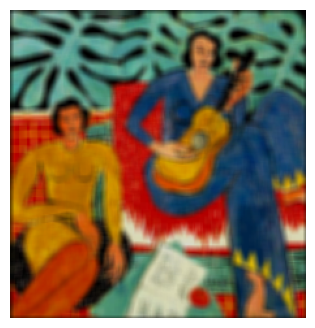

In [7]:
show_image(box_blur_slow(image, 6))